#**Adidas Sales Analysis ⚽**

**Requirements**
1. **Plotly**

<hr>

#**Business problems that can be solved using this dataset:**
* **Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?**
* **Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?**
* **Profit Margin Analysis: Does the profit margin significantly impact sales?**
* **Efficiency of Sales Methods: Which sales method is more effective - in-store or online?**
* **Price Optimization: Is there a specific price range that achieves better sales than others?**
* **Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.**
* **Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.**
* **Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.**
* **Predictive Sales Analysis: Develop a forecast for monthly sales.**

<hr>

In [2]:
!pip install xlrd


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install datatable


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install dask


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install seaborn
!pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<hr>

#**Step 1: Importing Libraries**

<hr>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import datatable as dt  # for a better data uploading
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from dask import dataframe as dd  # for better data uploading
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

<hr>

#**Step 2: Data Loading**

<hr>

**Data Loading using datatable**

In [7]:
import datatable as dt
file_loc = 'D:/Python Programming/Training/AdidasAnalysis/Adidas_US_Sales.csv'
dt_df = dt.fread(file_loc)

In [8]:
dt_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
5,Foot Locker,1185732,06-01-2020,Northeast,New York,New York,Women's Apparel,$50.00,1000,"$5,00,000","$1,25,000",25%,In-store
6,Foot Locker,1185732,07-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1250,"$6,25,000","$3,12,500",50%,In-store
7,Foot Locker,1185732,08-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$4,50,000","$1,35,000",30%,Outlet
8,Foot Locker,1185732,21-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$3,80,000","$1,33,000",35%,Outlet


Here we are using the datatable for the analysis, since it's faster than normal pandas

In [9]:
dt_df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
5,Foot Locker,1185732,06-01-2020,Northeast,New York,New York,Women's Apparel,$50.00,1000,"$5,00,000","$1,25,000",25%,In-store
6,Foot Locker,1185732,07-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1250,"$6,25,000","$3,12,500",50%,In-store
7,Foot Locker,1185732,08-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$4,50,000","$1,35,000",30%,Outlet
8,Foot Locker,1185732,21-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$3,80,000","$1,33,000",35%,Outlet


In [10]:
# converting the datatable into pandas DataFrame
df = dt_df.to_pandas()

In [11]:
df.shape

(9648, 13)

<hr>

#**Step 3: Exploratory Data Analysis**

<hr>

In [12]:
df.shape

(9648, 13)

In total we are having 9648 sales records, with distribution across the 13 different columns

<hr>

**Data Description**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int32 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   int32 
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int32(2), object(11)
memory usage: 904.6+ KB


Insights:
1. Invoice Data is in the format of object, we can change it to the datetime object for better clarity

<hr>

<hr>

**A check for the null values**

In [14]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

No null values detected

<hr>

<hr>

#**Step 4: Data Inspection Phase**


In [15]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [16]:
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet
9647,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$29.00,83,"$2,407",$650,27%,Outlet


Insights:
1. Retailer, Region, State, City, Product, Sales Method are having the ordinal category values

2. Retailer ID can be the unique value column

3. Operating Margin can be useful

4. There are some characters in the numerical values, so we need to seperate them as well

<hr>

<hr>

**Working with the insights**

In [17]:
# seperating the extra characters from the numerical columns

df['Total Sales'] = df['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
df['Operating Profit'] = df['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
df['Operating Margin'] = df['Operating Margin'].astype(str).str.replace(r'[%, ]', '', regex=True).astype(float)

In [18]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900.0,540000.0,162000.0,30.0,In-store


In [19]:
# converting the date to datetime object
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y')



In [20]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900.0,540000.0,162000.0,30.0,In-store


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int32         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 942.3+ KB


<hr>

# **Sales Performance Analysis**

**Which product are excelling in sales, and which are underperforming?**

In [22]:
# finding the total revenue
total_revenue = df['Total Sales'].sum()
print(f'The total Revenue: {total_revenue}')

The total Revenue: 899902125.0


In [23]:
# Aggregating the total sales and units sold for each product
prod_sales = df.groupby('Product').agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
# sorting product by the total values by decreasing to find the top prod
top_prod = prod_sales.sort_values(by='Total Sales', ascending = False)
# results
print('The top performing Products in the dataset')
top_prod

The top performing Products in the dataset


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320.0
3,Women's Apparel,179038860.0,433827.0
1,Men's Athletic Footwear,153673680.0,435526.0
5,Women's Street Footwear,128002813.0,392269.0
0,Men's Apparel,123728632.0,306683.0
4,Women's Athletic Footwear,106631896.0,317236.0


Insights:

* The **Men's Street Footwear** are the most selling item in the entire dataset, with total sales value of 208826244

In [24]:
# reversing the list to find the least performing product
least_prod = prod_sales.sort_values(by = 'Total Sales')
print('Least Performed')
least_prod

Least Performed


,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236.0
0,Men's Apparel,123728632.0,306683.0
5,Women's Street Footwear,128002813.0,392269.0
1,Men's Athletic Footwear,153673680.0,435526.0
3,Women's Apparel,179038860.0,433827.0
2,Men's Street Footwear,208826244.0,593320.0


Insights:

* From here we can clearly see that the **Women's Athletic Footwear** is the one which having the lowest sales in all, with values of 106631896

<hr>

<hr>

# **Regional Market Analysis**

**Which stores are experiencing strong sales, and which ones are lagging**

In [25]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900.0,540000.0,162000.0,30.0,In-store


For this we need to work with the cities to find out the best and the worst performing stores

In [26]:
# cities that are unique
unique_cities = df['City'].unique()
print(f'The unique cities: {unique_cities}')

The unique cities: ['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroit' 'St. Louis'
 'Salt Lake City' 'New Orleans' 'Boise' 'Phoenix' 'Albuquerque' 'Atlanta'
 'Charleston' 'Charlotte' 'Columbus' 'Louisville' 'Jackson' 'Little Rock'
 'Oklahoma City' 'Wichita' 'Sioux Falls' 'Fargo' 'Des Moines' 'Milwaukee'
 'Indianapolis' 'Baltimore' 'Wilmington' 'Newark' 'Hartford' 'Providence'
 'Boston' 'Burlington' 'Manchester']


In [27]:
# how many are there
noOfCities = df['City'].nunique()
print(f'The total number of unique cities: {noOfCities}')

The total number of unique cities: 52


In [28]:
# grouping the cities and retailers and summing up the units sold
unitsCities = df.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()

# sorting the results withing the city to find the top and worst store
sortedDf = unitsCities.sort_values(by = ['City', 'Units Sold'], ascending = [True, False])

# getting the performers
topStore = sortedDf.groupby('City').head(1)

# worst
leastStore = sortedDf.groupby('City').tail(1)

In [29]:
# results
print('Top Performing Store in Each City')
topStore.head()

Top Performing Store in Each City


,City,Retailer,Units Sold
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
4,Anchorage,Amazon,26749.0
7,Atlanta,Sports Direct,41414.0
8,Baltimore,Foot Locker,9322.0


In [30]:
# least performing cities
print('Least Performing Store in city')
leastStore.head()

Least Performing Store in city


,City,Retailer,Units Sold
0,Albany,Kohl's,10053.0
3,Albuquerque,Sports Direct,8881.0
5,Anchorage,Foot Locker,4066.0
6,Atlanta,Foot Locker,14977.0
10,Baltimore,West Gear,5647.0


The list of all the store that are least performing in each city

<hr>

<hr>

# **Profit Margin Analysis**

**Does the operating profit significantly impact sales**

In [31]:
def corrnFunc(val):
  if val >=0.90:
    return f'The value of correlation is {val}, that shows high correlation between both entities'
  elif val >=0.70 and val<0.90:
    return f'The values of correlation is {val}, that should a positive correlation that is not that bad'
  else:
    return 'Weak correlation'

In [32]:
# checking the correlation between Operating profit and total sales
corrn = df['Operating Profit'].corr(df['Total Sales'])
corrnFunc(corrn)

'The value of correlation is 0.9563074748281607, that shows high correlation between both entities'

In [33]:
# checking the correlation between Operating profit and Units Sold
corrn = df['Operating Profit'].corr(df['Units Sold'])
corrnFunc(corrn)

'The values of correlation is 0.8923794236295572, that should a positive correlation that is not that bad'

Insights:

* The correlation for the both the comparison are high.

* This indicates that if the total sales will go up then the Operating Profit will also go up.

* **So the answer is Yes, the operating Profit does affect Units Sold in a positive way**

<hr>

<hr>

# **Efficiency of Sales Methods**

**Which Sales method is more effective --> In-store or online**

In [34]:
# finding the unique cols in df
salesMeth = df["Sales Method"].unique()
print(f'The available sales methods: {salesMeth}')

The available sales methods: ['In-store' 'Outlet' 'Online']


In [35]:
# using plotly we will try to plot these all
!pip install us


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from us import states
stateCol = df['State']

# Getting the two letter short names of the state names
stateName = []
for x in stateCol:
  try:
    # finding the name for the states
    name = states.lookup(x).abbr
  except AttributeError:
    # incase we are not able to find the same, we set the Name to Unknown / None
    name = 'Unknown'
  stateName.append(name)


In [37]:
# creating a new column having the shortforms
df['State_ShortForm'] = stateName
df['State_ShortForm'].head()

0    NY
1    NY
2    NY
3    NY
4    NY
Name: State_ShortForm, dtype: object

In [38]:
df['State_ShortForm'].unique()

array(['NY', 'TX', 'CA', 'IL', 'PA', 'NV', 'CO', 'WA', 'FL', 'MN', 'MT',
       'TN', 'NE', 'AL', 'ME', 'AK', 'HI', 'WY', 'VA', 'MI', 'MO', 'UT',
       'OR', 'LA', 'ID', 'AZ', 'NM', 'GA', 'SC', 'NC', 'OH', 'KY', 'MS',
       'AR', 'OK', 'KS', 'SD', 'ND', 'IA', 'WI', 'IN', 'WV', 'MD', 'DE',
       'NJ', 'CT', 'RI', 'MA', 'VT', 'NH'], dtype=object)

In [39]:
!pip install --upgrade nbformat
!pip install --upgrade plotly




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Using the choropleth Map trying to plot Sales by each state, product and sales Method in US**

In [40]:
df['Total Sales'] = df['Total Sales'].replace('[$,]', "", regex = True).astype(float)

# making canvas
fig = go.Figure()
#all the unique products and sales method
prod = df['Product'].unique()
salesMeth = df['Sales Method'].unique()

# adding the traces for each combination of products and sales
for x in prod:
  for y in salesMeth:
    filterDf = df[(df['Product']==x) & (df['Sales Method']==y)]
    stateSales = filterDf.groupby('State_ShortForm')['Total Sales'].sum().reset_index()

    fig.add_trace(
        go.Choropleth(
            locations = stateSales['State_ShortForm'],
            z = stateSales['Total Sales'],
            locationmode = 'USA-states',
            colorscale = 'tealrose',
            name = f'{x} - {y}',
            showscale = True,
            visible = False, # hidding all traces initially
        )
    )


# updating the layout with dropdowns (this is for products)
prod_button = [
    {'label': x,
     'method':'update',
     'args':[{'visible':[traces.name.startswith(x) for traces in fig.data]}]}
    for x in prod
]

# updating the same for sales
sales_button = [
    {'label': y,
     'method':'update',
     'args':[{'visible':[y in trace.name for trace in fig.data]}]}
    for y in salesMeth
]

fig.update_layout(
    updatemenus = [
        {'buttons':prod_button,
         'direction':'down',
         'showactive': True,
         'x':0.25,
         'xanchor':'left',
         'y':1.15,
         'yanchor':'top'
         },
        {'buttons':sales_button,
         'direction':'down',
         'showactive': True,
         'x':0.75,
         'xanchor':'left',
         'y':1.15,
         'yanchor':'top'
         }],
    geo = dict(scope = 'usa'),
    title = 'Total Sales by State, Product and Sales Method available'
)

# displaying the first product and first sales
if fig.data:
  fig.data[0].visible = True

fig.show()


'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int32         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  State_ShortForm   9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [42]:
# working on the method to segment and aggregate data by Sales
salesData = df.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'})

# Calculating the Operating Margin for each sales method
salesData['Operating Margin'] = salesData['Operating Profit'] / salesData['Total Sales']

salesData

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,127591382.0,0.357756
Online,247672882.0,96555337.0,0.389850
Outlet,295585493.0,107988403.0,0.365337


In [43]:
#Which method is best
# Segmenting and aggregating data by 'Sales Method'
salesData = df.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'})

# Calculating the Operating Margin for each sales method
salesData['Operating Margin'] = salesData['Operating Profit'] / salesData['Total Sales']

salesData

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,127591382.0,0.357756
Online,247672882.0,96555337.0,0.389850
Outlet,295585493.0,107988403.0,0.365337


What are the information that we are getting from here:

1. **Total Sales**
  * In-store: 35,66,43,750
  * Online: 24,76,72,882
  * Outlet: 29,55,85,493

  Hence, it could be concluded from here that the highest sales was done by In-store purchases, followed by Online and then outlets

2. **Operating Profit**
  * In-store: 12, 75, 91, 300 
  * Online: 9,65,55,180
  * Outlet: 10, 79, 88, 300

  Similar to as of the total sales, in store sales lead in operating profit, followed by the outler and then online

3. **Operating Margin** 
  * In-store: 0.3577 (or 35.7%)
  * Online: 0.3898 (or 38.98%)
  * Outlet: 0.3653 (or 36.53%)

While in-stores generate the most overall sales and profit, but online stores are actually more efficient in terms of profit per sale. Here's the breakdown:

* In-store:

  * Wins in total sales and profit: brings in the most money overall.

* Online:

  * Shines in operating margin: makes more profit compared to its sales volume.

* The Verdict:

  * It depends on your priorities:

    * Maximize total sales and profit? Go in-store.
    * Prioritize efficiency and profit per sale? Choose online.
Bonus: Many businesses use both channels (omnichannel approach) to leverage the strengths of each!

<hr>

<hr>

# **Price Optimization**

**Is there any specific price range that has better sales than others**

In [44]:
# determining the price ranges
bins = [a for a in range(0, 131, 10)]
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

In [45]:
# replacing the $ infront of the Price segment
df['Price per Unit'] = df['Price per Unit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

In [46]:
# Create a new column for the price range
df['Price Range'] = pd.cut(df['Price per Unit'], bins)

# Group by the price range and sum the total sales
salesPrice = df.groupby('Price Range')['Total Sales'].sum().reset_index()

# Sorting the results to see which price range has the highest sales
salesPrice = salesPrice.sort_values(by='Total Sales', ascending=False)

# Results are sorted based on Total Sales 
salesPrice

C:\Users\Aman Raghuvanshi\AppData\Local\Temp\ipykernel_12188\3945029061.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price Range,Total Sales
5,"(50, 60]",242496502.0
4,"(40, 50]",230280807.0
6,"(60, 70]",149990285.0
3,"(30, 40]",122514187.0
7,"(70, 80]",55722579.0
2,"(20, 30]",42774023.0
8,"(80, 90]",29104920.0
9,"(90, 100]",11251185.0
1,"(10, 20]",9583978.0
10,"(100, 110]",5865706.0


**Insights**
1. The highest sales is in the price range of [50, 60] ($24,24,96,502), resembling the fact that products priced withing this range are very popular.

2. The next is [40, 50] range and then [60,70] range. These are also the significant one to be in trend

3. The least sales are for the most expensive ones

**Conclusion**

    * Products in mid-range are more popular and seems to make good profit. This indicates a that customers are more inclined towards the mid-range

    * This could be due to a numerous reasons, such as promotions, or competitions

<hr>

<hr>

# **Product Portfolio Optimization**

**Determine which products are more profitable as per the location**

In [47]:
# need to group the data by products and location
data = df.groupby(['City', 'Product']).agg({
    'Operating Profit':'sum',
    'Total Sales':'sum'
}).reset_index()

# calculation of profit margin
data['Profit Margin'] = data['Operating Profit']/data['Total Sales']

# sorting to find the most profitable product
data.sort_values(by = ['City', 'Profit Margin'], ascending = [True, False], inplace= True)

# res
topRes = data.groupby('City').head()

In [48]:
topRes

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.0,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649930.0,5773987.0,0.458943
0,Albany,Men's Apparel,1354935.0,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329205.0,3829596.0,0.347088
4,Albany,Women's Athletic Footwear,908095.0,2973011.0,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,1016331.0,2520405.0,0.403241
310,Wilmington,Women's Athletic Footwear,500969.0,1242580.0,0.403168
311,Wilmington,Women's Street Footwear,605628.0,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244059.0,3522197.0,0.353205


In [49]:
# Grouping data by product and city and summing total sales
grpData = df.groupby(['Product', 'City'])['Total Sales'].sum().reset_index()

# For each product, find the city where it performs the best and the worst
best_worst_performing_cities = []

for product in grpData['Product'].unique():
    product_data = grpData[grpData['Product'] == product]
    best_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].max()]
    worst_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].min()]
    best_worst_performing_cities.extend([best_city, worst_city])

# Concatenating the results into a single DataFrame
best_worst_performing_cities_df = pd.concat(best_worst_performing_cities).reset_index(drop=True)

# Display the results
print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_df

Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


**Insights**

1. **Profit Insights**
    * Albany:
        Women's apparel is the most profitable category, with a margin around 49%. Men's street footwear comes in second with a profit margin of around 46%.

    * Wilmington:
        Women's apparel is again profitable, but with a slightly lower margin of around 40%. Women's athletic footwear and women's street footwear are equally profitable, both with margins around 40%.

2. **Sales Performance Insights**
    * New York: dominates in athletic apparel for both men and women, suggesting a fitness-focused customer base.

    * Charleston shines in men's street footwear, implying a fashion-conscious male population.

    * San Francisco leads in women's street footwear, indicating a trendsetting female demographic.

    * Omaha lags behind in all categories, possibly due to weaker market reach or lower product demand.

3. **Conclusion: Tailoring Strategies for City-Specific Success**

    The diverse sales performance and product preferences across cities like New York, Charleston, San Francisco, Omaha, Albany, and Wilmington paint a clear picture: one-size-fits-all marketing just won't cut it.

* Embrace the differences:

    * New York's fitness culture calls for amplifying athletic apparel offerings.

    * Charleston's fashion-conscious men demand trend-driven footwear promotions.

    * San Francisco's trendsetting women deserve targeted campaigns showcasing the latest street styles.

    * Omaha's lower demand necessitates strategies to boost market penetration or cater to unique preferences.

    * Remember: Albany and Wilmington showcase distinct preferences within women's fashion, highlighting the need for granular market analysis even within seemingly similar regions.

    By adapting sales and marketing strategies to each city's unique character, businesses can unlock their full potential in diverse markets

<hr>

<hr>

# **Market Expansion Oppurtunities**

**Identifying the stores on their performance based on their location**

In [50]:
# group data by both city and store
grpData = df.groupby(['City', 'Retailer']).agg({
    'Total Sales':'sum',
    'Operating Profit':'sum'
}).reset_index()

# calculating performance matrix
grpData['Profit Margin'] = grpData['Operating Profit'] / grpData['Total Sales']

# sort
grpData = grpData.sort_values(by = ['City', 'Total Sales', 'Profit Margin'], ascending = [True, False, False])

# res
print("The Store Performance by City")
grpData

The Store Performance by City


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062411.0,0.388828
0,Albany,Kohl's,3692639.0,1367453.0,0.370319
2,Albuquerque,Kohl's,17065965.0,5783676.0,0.338901
3,Albuquerque,Sports Direct,2799051.0,954394.0,0.340971
4,Anchorage,Amazon,13365025.0,4143814.0,0.310049
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681461.0,0.400592
105,Wichita,Kohl's,6451914.0,2279782.0,0.353350
104,Wichita,Foot Locker,3520950.0,1230377.0,0.349445
106,Wilmington,Foot Locker,8387568.0,3077357.0,0.366895


**Summary:**
The data has been combined to show the performance of different retail stores in various cities. The main component are Total Sales, Operating Profit and Profit Margin. Stored are combined by city and retailer, provide a efficient picture of each store's performance in a location

**Top Performers**
    In Albany, the retailer named 'West Gear' is the top performer. 

**Comparative Performance**
    In cities with numerous different retailers there has been a significant difference in both sales and profit margin between stores. For eg: In Albuquerque, 'Kohl's' has the high sales but lower profit as compared to 'Sport Direct'

**Sales vs Profit Margin**
    There is not a direct correlation between sales and high profit margin always. For eg: 'Kohl's' in Wichita has higher sales than 'Foot Locker' in the same city, yet their profit margins are fairly close (35.3% for Kohl's vs. 34.9% for Foot Locker).

**Conclusion**
    This information can be used to identify the strong and weak performing areas, optimize operation and strategize for market expansion or improvement.
    

<hr>



<hr>

# **Time Series Analysis**

**Find out whether there has been a constant sales trend over time or any monthly trend**

In [56]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

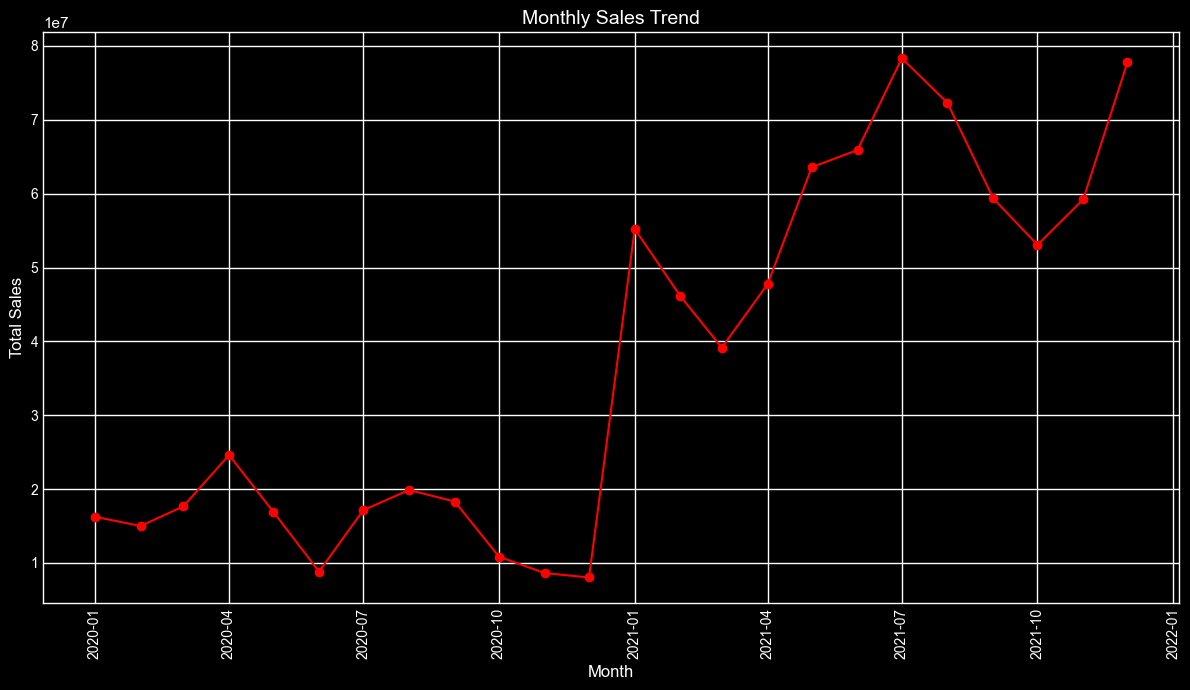

In [63]:
plt.style.use('dark_background')
# group data by month and calculate the sales for each month
monSales = df.groupby(df['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# converting index to Datetime
monSales.index = monSales.index.to_timestamp()

# setting style
# sns.set(style = 'darkgrid')

# plot
plt.figure(figsize=(12, 7))
plt.plot(monSales.index, monSales.values, marker = 'o', color = 'red', linestyle = 'solid')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Sales', fontsize = 12)
plt.title('Monthly Sales Trend', fontsize = 14)
plt.xticks(rotation = 90)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.tight_layout()
plt.show()

In [65]:
# calculate the difference between consective monthts for trend
diff = monSales.diff()

# defining threshold for seasonality (significant changes)
seasonal_threshold = 10000

# check for seasonallity
if (diff.abs() > seasonal_threshold).any():
    print('The sales follows a seasonality')
else:
    print('The sales doesnt follows seasonality')
    


# check for trend
if (diff > 0).all():
    print('There is an increasing trend!')
elif (diff < 0).all():
    print('There is decreasing trend!')
else:
    print("There is no consistent trend!")


The sales follows a seasonality
There is no consistent trend!


**Insights**

In [ ]:
# c